In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec
from sklearn.preprocessing import MinMaxScaler

In [2]:
# Define the alpha value for the post-plasma materials
alpha = 0.65

# Define the color for each material
cb_colors = {
    'γ-Al₂O₃': (0/255, 0/255, 0/255),
    '2% CuO@γ-Al₂O₃': (86/255, 180/255, 233/255),
    '10% CuO@γ-Al₂O₃': (0/255, 114/255, 178/255),
    '2% Fe₂O₃@γ-Al₂O₃': (230/255, 159/255, 0/255),
    '10% Fe₂O₃@γ-Al₂O₃': (213/255, 94/255, 0/255),

    'γ-Al₂O₃ pre-plasma': (
        (0 * alpha + 255 * (1 - alpha)) / 255,
        (0 * alpha + 255 * (1 - alpha)) / 255,
        (0 * alpha + 255 * (1 - alpha)) / 255
    ),
    '2% CuO@γ-Al₂O₃ pre-plasma': (
        (86 * alpha + 255 * (1 - alpha)) / 255,
        (180 * alpha + 255 * (1 - alpha)) / 255,
        (233 * alpha + 255 * (1 - alpha)) / 255
    ),
    '10% CuO@γ-Al₂O₃ pre-plasma': (
        (0 * alpha + 255 * (1 - alpha)) / 255,
        (114 * alpha + 255 * (1 - alpha)) / 255,
        (178 * alpha + 255 * (1 - alpha)) / 255
    ),
    '10% CuO@γ-Al₂O₃\npre-plasma': (
        (0 * alpha + 255 * (1 - alpha)) / 255,
        (114 * alpha + 255 * (1 - alpha)) / 255,
        (178 * alpha + 255 * (1 - alpha)) / 255
    ),
    '2% Fe₂O₃@γ-Al₂O₃ pre-plasma': (
        (230 * alpha + 255 * (1 - alpha)) / 255,
        (159 * alpha + 255 * (1 - alpha)) / 255,
        (0 * alpha + 255 * (1 - alpha)) / 255
    ),
    '10% Fe₂O₃@γ-Al₂O₃ pre-plasma': (
        (213 * alpha + 255 * (1 - alpha)) / 255,
        (94 * alpha + 255 * (1 - alpha)) / 255,
        (0 * alpha + 255 * (1 - alpha)) / 255
    ),
    'γ-Al₂O₃ post-plasma': (0/255, 0/255, 0/255),
    '2% CuO@γ-Al₂O₃ post-plasma': (86/255, 180/255, 233/255),
    '10% CuO@γ-Al₂O₃ post-plasma': (0/255, 114/255, 178/255),
    '10% CuO@γ-Al₂O₃\npost-plasma': (0/255, 114/255, 178/255),
    '2% Fe₂O₃@γ-Al₂O₃ post-plasma': (230/255, 159/255, 0/255),
    '10% Fe₂O₃@γ-Al₂O₃ post-plasma': (213/255, 94/255, 0/255)
}

# determine order of materials for plotting
material_order = [
    'γ-Al₂O₃',
    '2% CuO@γ-Al₂O₃',
    '2% Fe₂O₃@γ-Al₂O₃',
    '10% CuO@γ-Al₂O₃',
    '10% Fe₂O₃@γ-Al₂O₃',
    'γ-Al₂O₃ pre-plasma',
    '2% CuO@γ-Al₂O₃ pre-plasma',
    '2% Fe₂O₃@γ-Al₂O₃ pre-plasma',
    '10% CuO@γ-Al₂O₃ pre-plasma',
    '10% Fe₂O₃@γ-Al₂O₃ pre-plasma',
    'γ-Al₂O₃ post-plasma',
    '2% CuO@γ-Al₂O₃ post-plasma',
    '2% Fe₂O₃@γ-Al₂O₃ post-plasma',
    '10% CuO@γ-Al₂O₃ post-plasma',
    '10% Fe₂O₃@γ-Al₂O₃ post-plasma'
]

In [3]:
# Define the path to the Excel file
excel_file_path = (
    r'N:\FWET\FDCH\AdsCatal\General\personal_work_folders\plasmacatdesign'
    r'\materials\ugent\ugent-xrd-2023-08-03.xlsx'
)

# Read all worksheets in the Excel file into a dictionary of DataFrames
data = pd.read_excel(
    io=excel_file_path,
    sheet_name=['diffractograms', 'reflections']
)

# Assign each DataFrame to a separate variable
diffractogram_data = data['diffractograms']
reflections_data = data['reflections']

In [4]:
# Define a function to scale and flatten
def scale_and_flatten(series):
    return scaler.fit_transform(series.values.reshape(-1, 1)).flatten()

# Initialize the scaler
scaler = MinMaxScaler()

# Group the dataframe by 'material' and 'plasma'
grouped = diffractogram_data.groupby(['material', 'plasma'])

# Apply the scaler to 'cps' within each group
diffractogram_data['intensity_au'] = (
    grouped['cps'].transform(scale_and_flatten)
)

In [5]:
# Create 'material_plasma' column
diffractogram_data['material_plasma'] = (
    diffractogram_data['material'] + ' ' + diffractogram_data['plasma']
)

# Define material_plasma combinations for each subset
combinations_copper02 = [
    'γ-Al₂O₃ pre-plasma',
    'γ-Al₂O₃ post-plasma',
    '2% CuO@γ-Al₂O₃ pre-plasma',
    '2% CuO@γ-Al₂O₃ post-plasma'
]
combinations_copper10 = [
    'γ-Al₂O₃ pre-plasma',
    '10% CuO@γ-Al₂O₃ pre-plasma',
    '10% CuO@γ-Al₂O₃ post-plasma'
]
combinations_iron02 = [
    'γ-Al₂O₃ pre-plasma',
    '2% Fe₂O₃@γ-Al₂O₃ pre-plasma',
    '2% Fe₂O₃@γ-Al₂O₃ post-plasma'
]
combinations_iron10 = [
    'γ-Al₂O₃ pre-plasma',
    '10% Fe₂O₃@γ-Al₂O₃ pre-plasma',
    '10% Fe₂O₃@γ-Al₂O₃ post-plasma'
]

# Subset data for each material combination
diffractogram_copper02 = diffractogram_data[
    diffractogram_data['material_plasma'].isin(combinations_copper02)
].copy()

diffractogram_copper10 = diffractogram_data[
    diffractogram_data['material_plasma'].isin(combinations_copper10)
].copy()

diffractogram_iron02 = diffractogram_data[
    diffractogram_data['material_plasma'].isin(combinations_iron02)
].copy()

diffractogram_iron10 = diffractogram_data[
    diffractogram_data['material_plasma'].isin(combinations_iron10)
].copy()

In [6]:
# Define the order of materials
material_plasma_order = [
    'γ-Al₂O₃ pre-plasma',
    'γ-Al₂O₃ post-plasma',
    '2% CuO@γ-Al₂O₃ pre-plasma',
    '2% CuO@γ-Al₂O₃ post-plasma',
    '10% CuO@γ-Al₂O₃ pre-plasma',
    '10% CuO@γ-Al₂O₃ post-plasma',
    '2% Fe₂O₃@γ-Al₂O₃ pre-plasma',
    '2% Fe₂O₃@γ-Al₂O₃ post-plasma',
    '10% Fe₂O₃@γ-Al₂O₃ pre-plasma',
    '10% Fe₂O₃@γ-Al₂O₃ post-plasma'
]

In [7]:
# Group the data by 'material_plasma'
grouped_data = {
    'copper02': diffractogram_copper02,
    'copper10': diffractogram_copper10,
    'iron02': diffractogram_iron02,
    'iron10': diffractogram_iron10
}

for key, dataframe in grouped_data.items():
    grouped_data[key] = dataframe.groupby('material_plasma')

In [8]:
# Define the offset value and initialize current offset
offset = 0.6
current_offset = 0.1

# Add a new column to the dataframe for the shifted y-values
diffractogram_copper02['shifted_intensity_au'] = (
    diffractogram_copper02['intensity_au']
)

# Define the order of materials
material_plasma_order = [
    'γ-Al₂O₃ pre-plasma',
    'γ-Al₂O₃ post-plasma',
    '2% CuO@γ-Al₂O₃ pre-plasma',
    '2% CuO@γ-Al₂O₃ post-plasma'
]

# Iterate over each group in the specified order and increase offset
for material_plasma in material_plasma_order:
    mask = diffractogram_copper02['material_plasma'] == material_plasma
    diffractogram_copper02.loc[mask, 'shifted_intensity_au'] += current_offset
    current_offset += offset

In [9]:
# Define the offset value and initialize current offset
offset = 0.9
current_offset = 0.1

# Add a new column to the dataframe for the shifted y-values
diffractogram_copper10['shifted_intensity_au'] = (
    diffractogram_copper10['intensity_au']
)

# Define the order of materials
material_plasma_order = [
    'γ-Al₂O₃ pre-plasma',
    '10% CuO@γ-Al₂O₃ pre-plasma',
    '10% CuO@γ-Al₂O₃ post-plasma'
]

# Iterate over each group in the specified order and increase offset
for material_plasma in material_plasma_order:
    mask = diffractogram_copper10['material_plasma'] == material_plasma
    diffractogram_copper10.loc[mask, 'shifted_intensity_au'] += current_offset
    current_offset += offset

In [10]:
# Define the offset value and initialize current offset
offset = 0.9
current_offset = 0.1

# Add a new column to the dataframe for the shifted y-values
diffractogram_iron02['shifted_intensity_au'] = (
    diffractogram_iron02['intensity_au']
)

# Define the order of materials
material_plasma_order = [
    'γ-Al₂O₃ pre-plasma',
    '2% Fe₂O₃@γ-Al₂O₃ pre-plasma',
    '2% Fe₂O₃@γ-Al₂O₃ post-plasma'
]

# Iterate over each group in the specified order and increase offset
for material_plasma in material_plasma_order:
    mask = diffractogram_iron02['material_plasma'] == material_plasma
    diffractogram_iron02.loc[mask, 'shifted_intensity_au'] += current_offset
    current_offset += offset

In [11]:
# Define the offset value and initialize current offset
offset = 0.9
current_offset = 0.1

# Add a new column to the dataframe for the shifted y-values
diffractogram_iron10['shifted_intensity_au'] = (
    diffractogram_iron10['intensity_au']
)

# Define the order of materials
material_plasma_order = [
    'γ-Al₂O₃ pre-plasma',
    '10% Fe₂O₃@γ-Al₂O₃ pre-plasma',
    '10% Fe₂O₃@γ-Al₂O₃ post-plasma'
]

# Iterate over each group in the specified order
for material_plasma in material_plasma_order:
    mask = diffractogram_iron10['material_plasma'] == material_plasma
    diffractogram_iron10.loc[mask, 'shifted_intensity_au'] += current_offset
    current_offset += offset

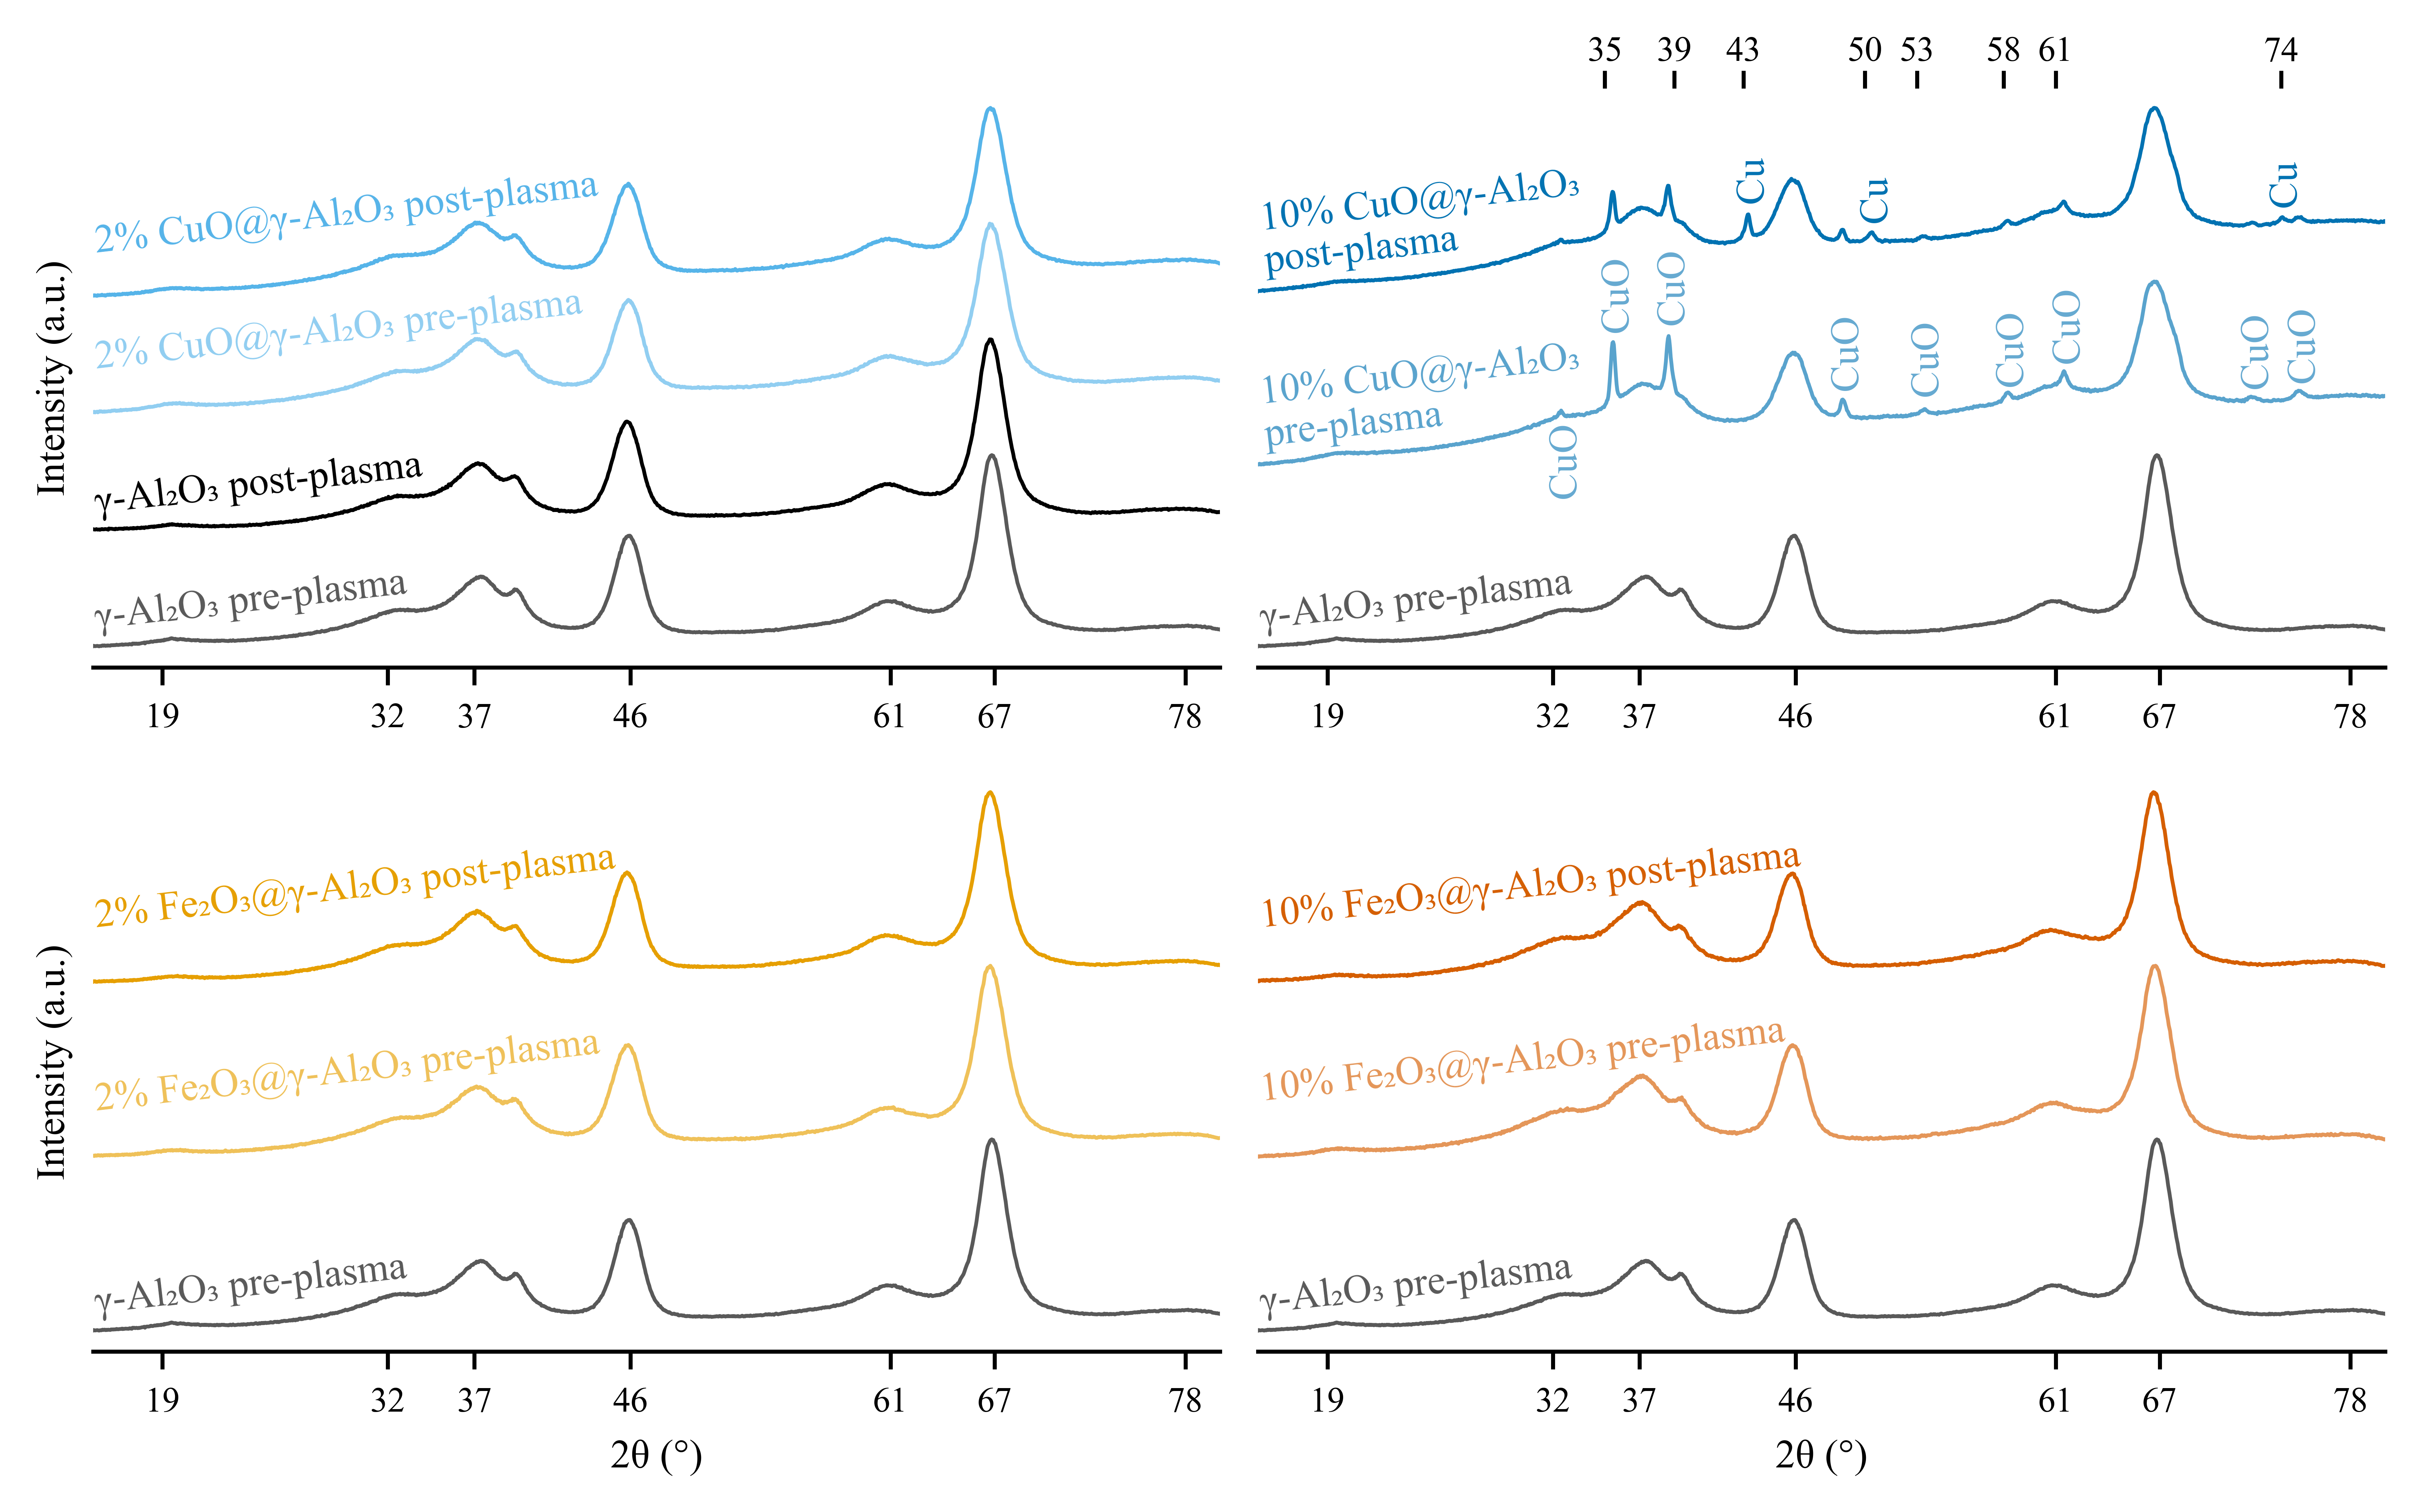

In [12]:
# Use Times New Roman font
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = 'Times New Roman'
plt.rcParams['mathtext.fontset'] = 'custom'
plt.rcParams['mathtext.rm'] = 'Times New Roman'
plt.rcParams['mathtext.it'] = 'Times New Roman:italic'
plt.rcParams['mathtext.bf'] = 'Times New Roman:bold'
plt.rcParams['font.size'] = 7

# Set the size of the figure in inches (1 inch = 25.4 mm)
fig = plt.figure(
    figsize=(170/25.4, 106.25/25.4),
    dpi=1000
)
gs = gridspec.GridSpec(
    nrows=2,
    ncols=2,
    figure=fig
)

# Create the remaining four subplots
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[1, 0])
ax4 = fig.add_subplot(gs[1, 1])

# First plot
sns.lineplot(
    x='2theta_degree',
    y='shifted_intensity_au',
    hue='material_plasma',
    hue_order=material_order,
    data=diffractogram_copper02,
    palette=cb_colors,
    linewidth=0.75,
    ax=ax1,
    legend=False
)

# ax1 x-axis settings
ax1.set_xlim(15, 80)
ax1.set_xlabel(None)
ax1.set_xticks(ticks=[19, 32, 37, 46, 61, 67, 78])
ax1.tick_params(
    axis='x',
    labelsize=7
)

# ax1 y-axis settings
ax1.set_ylim(0, 3)
ax1.set_ylabel(
    ylabel='Intensity (a.u.)',
    fontsize=8
)
ax1.tick_params(
    axis='y',
    which='both',
    left=False,
    labelleft=False
)

# Define the label points manually
label_points_ax1 = {
    'γ-Al₂O₃ pre-plasma': (15, 0.2),
    'γ-Al₂O₃ post-plasma': (15, 0.8),
    '2% CuO@γ-Al₂O₃ pre-plasma': (15, 1.55),
    '2% CuO@γ-Al₂O₃ post-plasma': (15, 2.15)
}

# Loop through each item in label_points
# and add a text label with an offset
for material_plasma, (x, y) in label_points_ax1.items():
    ax1.annotate(
        text=material_plasma,
        xy=(x, y),
        xytext=(0, 0),
        textcoords='offset points',
        fontsize=8,
        color=cb_colors[material_plasma],
        rotation=6.5
    )

# Second plot
sns.lineplot(
    x='2theta_degree',
    y='shifted_intensity_au',
    hue='material_plasma',
    hue_order=material_order,
    data=diffractogram_copper10,
    palette=cb_colors,
    linewidth=0.75,
    ax=ax2,
    legend=False
)

# ax2 x-axis settings
ax2.set_xlim(15, 80)
ax2.set_xlabel(None)
ax2.set_xticks(ticks=[19, 32, 37, 46, 61, 67, 78])
ax2.tick_params(
    axis='x',
    labelsize=7
)

# ax2 y-axis settings
ax2.set_ylim(0, 3)
ax2.yaxis.set_visible(False)

# Define the label points manually
label_points_ax2 = {
    'γ-Al₂O₃ pre-plasma': (15, 0.20),
    '10% CuO@γ-Al₂O₃\npre-plasma': (15, 1.15),
    '10% CuO@γ-Al₂O₃\npost-plasma': (15, 2.05)
}

# Loop through each item in label_points
# and add a text label with an offset
for material_plasma, (x, y) in label_points_ax2.items():
    ax2.annotate(
        text=material_plasma,
        xy=(x, y),
        xytext=(0,0),
        textcoords='offset points',
        fontsize=8,
        color=cb_colors[material_plasma],
        rotation=6.5
    )

# Third plot
sns.lineplot(
    x='2theta_degree',
    y='shifted_intensity_au',
    hue='material_plasma',
    hue_order=material_order,
    data=diffractogram_iron02,
    palette=cb_colors,
    linewidth=0.75,
    ax=ax3,
    legend=False
)

# ax3 x-axis settings
ax3.set_xlim(15, 80)
ax3.set_xlabel(
    xlabel='2θ (°)',
    fontsize=8
)
ax3.set_xticks(ticks=[19, 32, 37, 46, 61, 67, 78])
ax3.tick_params(
    axis='x',
    labelsize=7
)

# ax3 y-axis settings
ax3.set_ylim(0, 3)
ax3.set_ylabel(
    ylabel='Intensity (a.u.)',
    fontsize=8
)
ax3.tick_params(
    axis='y',
    which='both',
    left=False,
    labelleft=False
)

# Define the label points manually
label_points_ax3 = {
    'γ-Al₂O₃ pre-plasma': (15, 0.2),
    '2% Fe₂O₃@γ-Al₂O₃ pre-plasma': (15, 1.25),
    '2% Fe₂O₃@γ-Al₂O₃ post-plasma': (15, 2.20)
}

# Loop through each item in label_points
# and add a text label with an offset
for material_plasma, (x, y) in label_points_ax3.items():
    ax3.annotate(
        text=material_plasma,
        xy=(x, y),
        xytext=(0,0),
        textcoords='offset points',
        fontsize=8,
        color=cb_colors[material_plasma],
        rotation=6.5
    )

# Fourth plot
sns.lineplot(
    x='2theta_degree',
    y='shifted_intensity_au',
    hue='material_plasma',
    hue_order=material_order,
    data=diffractogram_iron10,
    palette=cb_colors,
    linewidth=0.75,
    ax=ax4,
    legend=False
)

# ax4 x-axis settings
ax4.set_xlim(15, 80)
ax4.set_xlabel(
    xlabel='2θ (°)',
    fontsize=8
)
ax4.set_xticks(ticks=[19, 32, 37, 46, 61, 67, 78])
ax4.tick_params(
    axis='x',
    labelsize=7
)

# ax4 y-axis settings
ax4.set_ylim(0, 3)
ax4.yaxis.set_visible(False)

# Define the label points manually
label_points_ax4 = {
    'γ-Al₂O₃ pre-plasma': (15, 0.2),
    '10% Fe₂O₃@γ-Al₂O₃ pre-plasma': (15, 1.30),
    '10% Fe₂O₃@γ-Al₂O₃ post-plasma': (15, 2.20)
}

# Loop through each item in label_points
# and add a text label with an offset
for material_plasma, (x, y) in label_points_ax4.items():
    ax4.annotate(
        text=material_plasma,
        xy=(x, y),
        xytext=(0, 0),
        textcoords='offset points',
        fontsize=8,
        color=cb_colors[material_plasma],
        rotation=6.5
    )

# Create the fifth axis
ax5 = ax2.twiny()
ax5.set_xlim(15, 80)
ax5.set_xlabel(None)
ax5.set_xticks(ticks=[35, 39, 43, 50, 53, 58, 61, 74])
ax5.tick_params(
    axis='x',
    labelsize=7,
    pad=0.5
)

# Define the label points manually
assignment_points_ax2 = {
    'peak01': (32.416, 0.92, 'CuO', 0.6),
    'peak02': (35.4345, 1.78, 'CuO', 0.6),
    'peak03': (38.66, 1.82, 'CuO', 0.6),
    'peak04': (48.69, 1.48, 'CuO', 0.6),
    'peak05': (53.3, 1.45, 'CuO', 0.6),
    'peak06': (58.189, 1.5, 'CuO', 0.6),
    'peak07': (61.45, 1.62, 'CuO', 0.6),
    'peak08': (72.31, 1.49, 'CuO', 0.6),
    'peak09': (75.01, 1.52, 'CuO', 0.6),
    'peak10': (43.223, 2.45, 'Cu', 1),
    'peak11': (50.352, 2.35, 'Cu', 1),
    'peak12': (73.96, 2.43, 'Cu', 1)
}

# Loop through each item in label_points
# and add a text label with an offset
for peak, (x, y, assignment, alpha_temp) in assignment_points_ax2.items():
    ax2.annotate(
        text=assignment,
        xy=(x, y),
        xytext=(-2.6, 0),
        textcoords='offset points',
        fontsize=8,
        color=((0*alpha_temp+255*(1-alpha_temp))/255,
               (114*alpha_temp+255*(1-alpha_temp))/255,
               (178*alpha_temp+255*(1-alpha_temp))/255),
        rotation=90
    )

# Remove spines
sns.despine(top=True, right=True, left=True)

plt.tight_layout()
plt.savefig(
    r'C:\Users\sbossier\Dropbox\Apps\Overleaf\ladca_incat_envecon_paper_elsevier\figs\sander_xrd.pdf'
)
plt.show()